# Customer Churn Prediction

This project predicts which customers are likely to churn using the Telco Customer Churn dataset. 

We perform:
- Data cleaning
- Feature encoding
- Logistic Regression modeling
- Evaluation with accuracy, precision, recall, and confusion matrix
- Visualization of top features influencing churn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots appear in the notebook
%matplotlib inline

# Show all columns when we print a table
pd.set_option('display.max_columns', None)


In [2]:
## Data Loading

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

### Churn Distribution
- We first visualize the distribution of churn to understand how many customers leave versus stay.


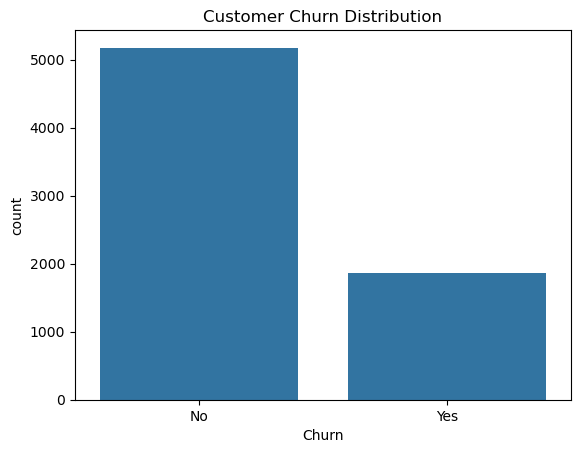

In [7]:
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution")
plt.show()


## Data Cleaning

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df['TotalCharges'].dtype

dtype('O')

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [11]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

## Feature Encoding

In [14]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [15]:
y = y.map({'Yes': 1, 'No': 0})


In [16]:
X.select_dtypes(include='object').columns


Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [17]:
X = pd.get_dummies(X, drop_first=True)


In [18]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,customerID_0015-UOCOJ,customerID_0016-QLJIS,customerID_0017-DINOC,customerID_0017-IUDMW,customerID_0018-NYROU,customerID_0019-EFAEP,customerID_0019-GFNTW,customerID_0020-INWCK,customerID_0020-JDNXP,customerID_0021-IKXGC,customerID_0022-TCJCI,customerID_0023-HGHWL,customerID_0023-UYUPN,customerID_0023-XUOPT,customerID_0027-KWYKW,customerID_0030-FNXPP,customerID_0031-PVLZI,customerID_0032-PGELS,customerID_0036-IHMOT,customerID_0040-HALCW,customerID_0042-JVWOJ,customerID_0042-RLHYP,customerID_0048-LUMLS,customerID_0048-PIHNL,customerID_0052-DCKON,customerID_0052-YNYOT,customerID_0056-EPFBG,customerID_0057-QBUQH,customerID_0058-EVZWM,customerID_0060-FUALY,customerID_0064-SUDOG,customerID_0064-YIJGF,customerID_0067-DKWBL,customerID_0068-FIGTF,customerID_0071-NDAFP,customerID_0074-HDKDG,customerID_0076-LVEPS,customerID_0078-XZMHT,customerID_0080-EMYVY,customerID_0080-OROZO,customerID_0082-LDZUE,customerID_0082-OQIQY,customerID_0083-PIVIK,customerID_0089-IIQKO,customerID_0093-EXYQL,customerID_0093-XWZFY,customerID_0094-OIFMO,customerID_0096-BXERS,customerID_0096-FCPUF,customerID_0098-BOWSO,customerID_0100-DUVFC,customerID_0103-CSITQ,customerID_0104-PPXDV,customerID_0106-GHRQR,customerID_0106-UGRDO,customerID_0107-WESLM,customerID_0107-YHINA,customerID_0111-KLBQG,customerID_0112-QAWRZ,customerID_0112-QWPNC,customerID_0114-IGABW,customerID_0114-PEGZZ,customerID_0114-RSRRW,customerID_0115-TFERT,customerID_0117-LFRMW,customerID_0118-JPNOY,customerID_0121-SNYRK,customerID_0122-OAHPZ,customerID_0123-CRBRT,customerID_0125-LZQXK,customerID_0128-MKWSG,customerID_0129-KPTWJ,customerID_0129-QMPDR,customerID_0130-SXOUN,customerID_0133-BMFZO,customerID_0134-XWXCE,customerID_0135-NMXAP,customerID_0136-IFMYD,customerID_0137-OCGAB,customerID_0137-UDEUO,customerID_0139-IVFJG,customerID_0141-YEAYS,customerID_0142-GVYSN,customerID_0147-ESWWR,customerID_0148-DCDOS,customerID_0151-ONTOV,customerID_0156-FVPTA,customerID_0164-APGRB,customerID_0164-XAIRP,customerID_0168-XZKBB,customerID_0174-QRVVY,customerID_0177-PXBAT,customerID_0178-CIIKR,customerID_0178-SZBHO,customerID_0181-RITDD,customerID_0186-CAERR,customerID_0187-QSXOE,customerID_0187-WZNAB,customerID_0188-GWFLE,customerID_0191-EQUUH,customerID_0191-ZHSKZ,customerID_0193-ESZXP,customerID_0195-IESCP,customerID_0196-JTUQI,customerID_0196-VULGZ,customerID_0197-PNKNK,customerID_0201-MIBOL,customerID_0201-OAMXR,customerID_0203-HHYIJ,customerID_0206-OYVOC,customerID_0206-TBWLC,customerID_0207-MDKNV,customerID_0208-BPQEJ,customerID_0212-ISBBF,customerID_0214-JHPFW,customerID_0215-BQKGS,customerID_0218-QNVAS,customerID_0219-QAERP,customerID_0219-YTZUE,customerID_0220-EBGCE,customerID_0221-NAUXK,customerID_0221-WMXNQ,customerID_0222-CNVPT,customerID_0224-HJAPT,customerID_0224-NIJLP,customerID_0224-RLWWD,customerID_0225-ZORZP,customerID_0228-MAUWC,customerID_0229-LFJAF,customerID_0230-UBYPQ,customerID_0230-WEQUW,customerID_0231-LXVAP,customerID_0233-FTHAV,customerID_0234-TEVTT,customerID_0235-KGSLC,customerID_0236-HFWSV,customerID_0237-YFUTL,customerID_0238-WHBIQ,customerID_0239-OXEXL,customerID_0244-LGNFY,customerID_0247-SLUJI,customerID_0248-IPDFW,customerID_0248-PGHBZ,customerID_0253-ZTEOB,customerID_0254-FNMCI,customerID_0254-KCJGT,customerID_0254-WWRKD,customerID_0256-LTHVJ,customerID_0257-KXZGU,customerID_0257-ZESQC,customerID_0258-NOKBL,customerID_0259-GBZSH,customerID_0260-ZDLGK,customerID_0263-FJTQO,customerID_0264-CNITK,customerID_0265-EDXBD,customerID_0265-PSUAE,customerID_0266-CLZKZ,customerID_0266-GMEAO,customerID_0268-QKIWO,customerID_0269-XFESX,customerID_0270-THENM,customerID_0274-JKUJR,customerID_0277-BKSQP,customerID_0277-ORXQS,customerID_0278-YXOOG,customerID_0280-XJGEX,customerID_0281-CNTZX,customerID_0282-NVSJS,customerID_0285-INHLN,customerID_0289-IVARM,customerID_0292-WEGCH,customerID_0

## Train-Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Modeling

In [21]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=500,
    solver='liblinear'
)

log_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,500
,multi_class,'deprecated'


In [22]:
y_pred = log_model.predict(X_test_scaled)


## Evaluation

### Accuracy score
- We evaluate our model using accuracy to see the percentage of correctly predicted churn and non-churn customers.

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.7839374555792467

### Confusion matrix
- The confusion matrix shows how well the model distinguishes between churned and retained customers, highlighting false positives and false negatives.

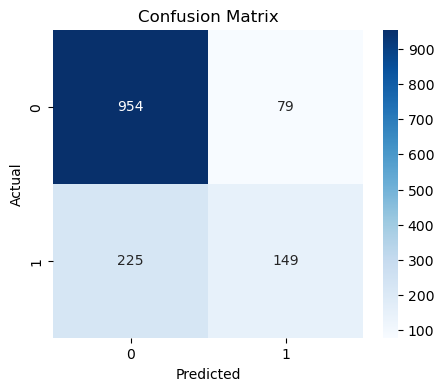

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Precision & Recall
- Precision and recall measure the quality of our churn predictions: recall shows how many actual churns we caught, and precision shows how many predicted churns were correct.

In [25]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

precision, recall


(0.6535087719298246, 0.3983957219251337)

## Insights

### Top 10 features increasing churn
- We visualize the features that most increase the likelihood of churn to identify high-risk characteristics.

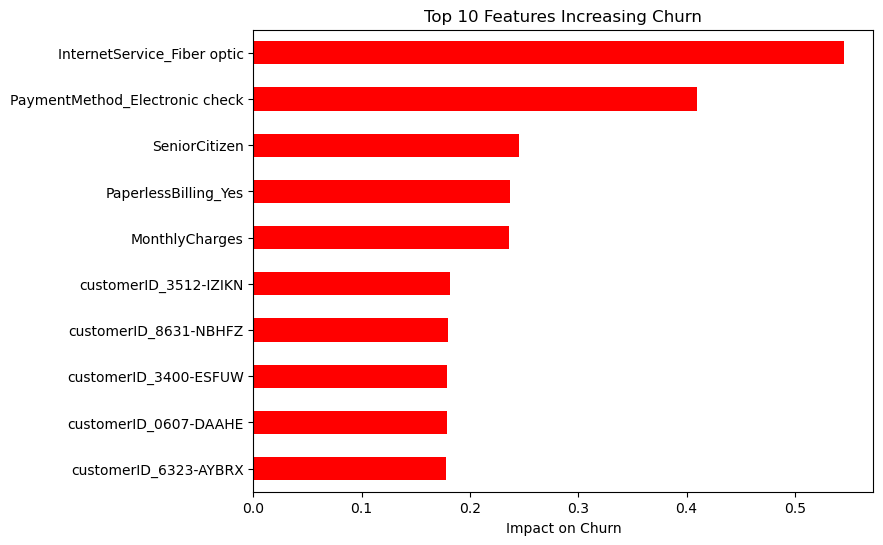

In [26]:
# Feature importance for Logistic Regression
feature_importance = pd.Series(log_model.coef_[0], index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot top 10 features increasing churn
plt.figure(figsize=(8,6))
feature_importance[:10].plot(kind='barh', color='red')
plt.title('Top 10 Features Increasing Churn')
plt.xlabel('Impact on Churn')
plt.gca().invert_yaxis()
plt.show()


### Top 10 features decreasing churn
- We visualize the features that most decrease the likelihood of churn to identify protective factors.

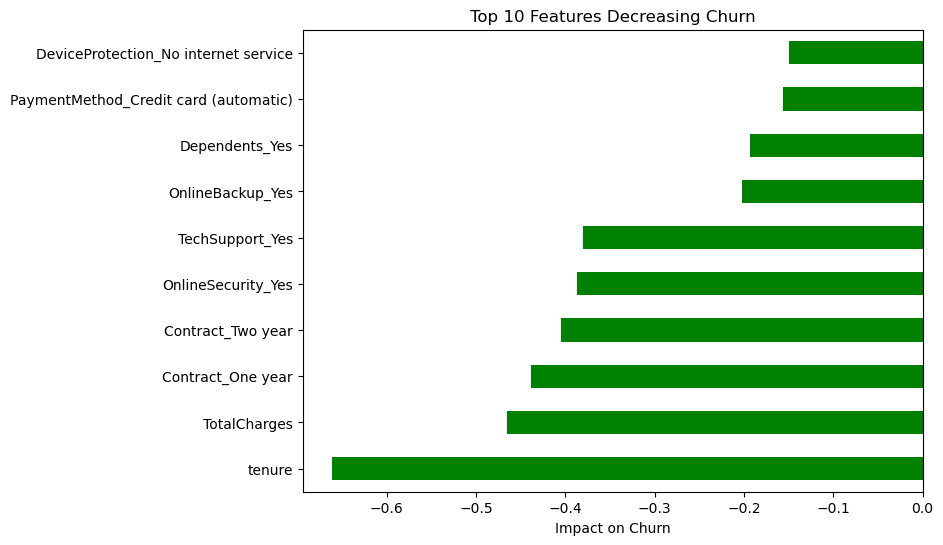

In [27]:
# Plot top 10 features decreasing churn
plt.figure(figsize=(8,6))
feature_importance[-10:].plot(kind='barh', color='green')
plt.title('Top 10 Features Decreasing Churn')
plt.xlabel('Impact on Churn')
plt.gca().invert_yaxis()
plt.show()

### Insights

- Customers on **month-to-month contracts** with high monthly charges are **more likely to churn**.
- Long-term contracts and certain payment methods are **protective against churn**.
- These insights allow the business to **target high-risk customers** with promotions or retention campaigns.